In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [5]:
data = pd.read_csv('Fish.csv')

In [6]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [7]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
y = data['Species']
X = data.drop('Species', axis=1)

In [9]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [10]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y_mappings = {index: label for index, label in enumerate(encoder.classes_)}

In [11]:
y_mappings

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [13]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

logistic_model.score(X_test, y_test)

0.75

In [14]:
inputs = tf.keras.Input(shape=(6,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

nn_model = tf.keras.Model(inputs=inputs, outputs=outputs)


nn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 1000

history = nn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

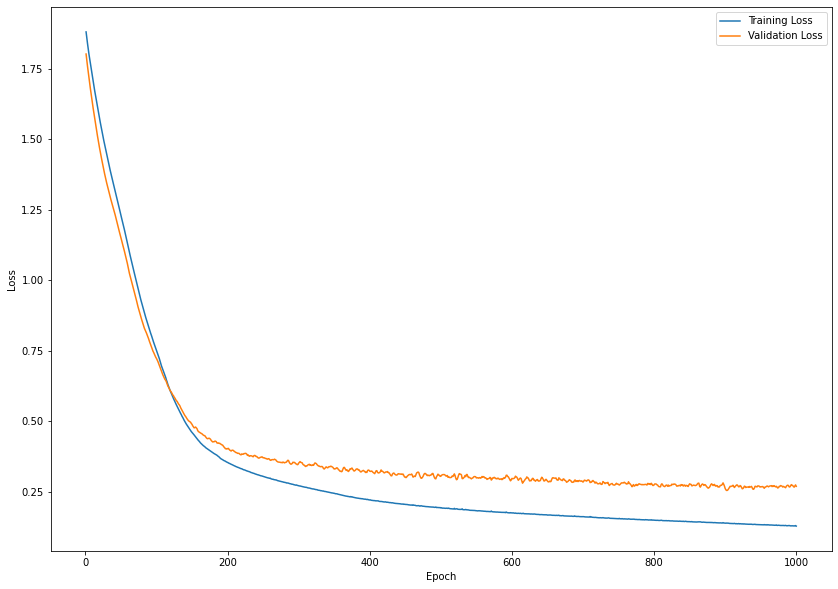

In [15]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [16]:
np.argmin(val_loss)

901

In [17]:
nn_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.4640 - accuracy: 0.8750


[0.463960736989975, 0.875]

In [19]:
#create a pickle file
import pickle
pickle_out = open("fish_pred_JM.pkl","wb")
pickle.dump(logistic_model,pickle_out)
pickle_out.close()